# Inventory and production

See https://www.dropbox.com/s/ugaldwnz7xznhfs/Sethi%2C%202000%2C%20%20Optimal%20Control%20Theory%20Applications%20to%20Management%20Science%20and%20Economics.pdf?dl=0 (p. 4). We consider the production and inventory storage of a given good, say of steel, in order to meet an exogenous demand.

Original continuous model

$\dot{x}=p-q,\dot{y}=x+\alpha p,$ therefore $A\doteq\begin{pmatrix}0&0\\1&0\end{pmatrix}$, $B_p\doteq\begin{pmatrix}1\\\alpha\end{pmatrix}$, and $B_q\doteq\begin{pmatrix}-1\\-\beta\end{pmatrix}$.

The continuous model will be discretised as
$$(\forall n\in\mathbb{N})\quad x_{n+1} = x_n + \gamma (p-q), y_{n+1} = \gamma x_n + y_n + \gamma\alpha q,$$
where $\alpha,\gamma\in\mathbb{R}_{++}$, $x\in[0,+a]$, $y\in[-b,+b]$, $p\in[0,+\mu]$, and $q\in[0,+\nu]$.

Interpretation: $x(t)$: inventory level, $y(t)$: cost, $p(t)$: production, $q(t)$: sales.

$(\forall n\in\mathbb{N})\quad C_{n+1}\doteq (\text{Id}-\gamma A)((C_{n} + P) \ominus Q)\cap C_n,$
where $C_0\doteq[0,+a]\times[0,+b]$. 

Furthermore, $P\doteq\{B_pp(t):(\forall t\in[0,T])\,p(t)\in[0,+\mu]\}=[0,+\mu]\times[0,+\alpha\mu]$, and $Q\doteq\{B_qq(t):(\forall t\in[0,T])\,q(t)\in[0,+\nu]\}=[-\nu,0]\times[-\beta\nu,0]$.

### Discretisation with Scipy

In [1]:
from scipy import signal as sig
import numpy as np

In [2]:
gamma = 1./10.

In [3]:
sys = sig.StateSpace(np.array([[0, 0], [1, 0]]), np.array([[1], [0]]), np.array([[0, 1]]), np.array([[0]]))
sys = sys.to_discrete(gamma)

In [4]:
A = matrix(np.ascontiguousarray(sys.A))
print(A)
Ainv = A.inverse()
print(Ainv)

[1.0 0.0]
[0.1 1.0]
[ 1.0 -0.0]
[-0.1  1.0]


In [5]:
B_p = matrix(np.ascontiguousarray(sys.B))
B_p

[                 0.1]
[0.005000000000000001]

### Discretisation  Laengle

Let $\varphi$ a set-valued operator and $\gamma\in\mathbb{R}_{++}$. The **resolvent** of $\varphi$ is
$$J_{\varphi}\doteq(\text{Id}+\varphi)^{-1}$$
and the **Yosida approximation** of $\varphi$ of index $\gamma$ is
$$^{\gamma}\varphi\doteq\frac{1}{\gamma}(\text{Id}-J_{\gamma\varphi}).$$

In [6]:
gamma, alpha, beta = 1./10., 1., 0.5

In [7]:
A = matrix([[0, 0], [1, 0]])
J = (matrix.identity(2) + gamma*A).inverse()   #Resolvent
yosA = 1/gamma*(matrix.identity(2) - J)
B_p = matrix([[1, alpha]])
B_q = matrix([[-1, -beta]])
print('A = ', A)
print('J = ', J)
print('yosA = ', yosA)
print('B_p =', B_p)
print('B_q =', B_q)

A =  [0 0]
[1 0]
J =  [  1.00000000000000  0.000000000000000]
[-0.100000000000000   1.00000000000000]
yosA =  [0.000000000000000 0.000000000000000]
[ 1.00000000000000 0.000000000000000]
B_p = [1.00000000000000 1.00000000000000]
B_q = [ -1.00000000000000 -0.500000000000000]


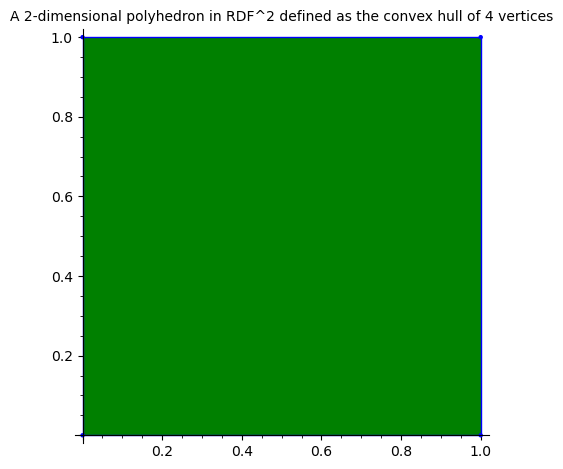

In [8]:
a, b = 1.0, 1.0
C = Polyhedron(vertices = [[0, 0], [0, +b], [+a, 0], [+a, +b]])
C

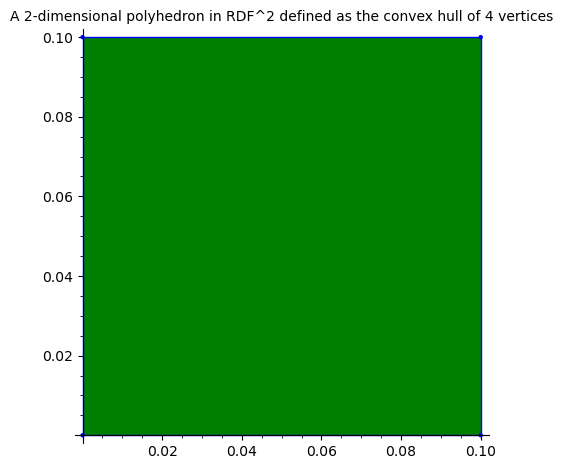

In [9]:
mu = 1.0           # 0.1, 0.3, 1.0, 2.0
P = Polyhedron(vertices = [[0, 0], [0, alpha*mu], [+mu, 0], [+mu, alpha*mu]])
gammaP = gamma*P
gammaP

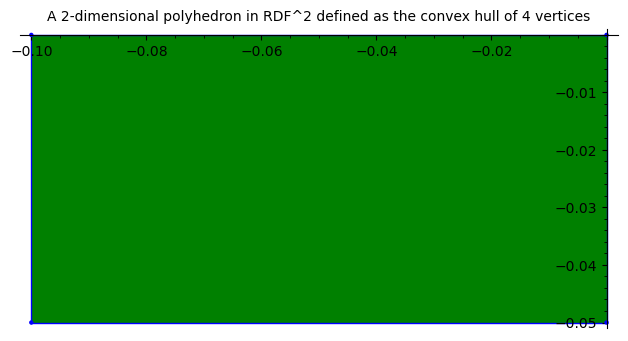

In [10]:
nu = 1.0
Q = Polyhedron(vertices = [[-nu, -beta*nu], [-nu, 0], [0, -beta*nu], [0, 0]])
gammaQ = gamma*Q
gammaQ

In [11]:
def exact(C0 = Polyhedron, gammaP = Polyhedron, gammaQ = Polyhedron, N = int, J = matrix):
    """
    Calculate the "exact" viable polyhedra of a system dx/dt = Ax + Bp
    
    C0     : Sage Polydedra of same dimension, P is the discretised approximation
    gammaP :
    gammaQ :
    N      : Positive integer
    J      : Resolvent
    """
    
    C, n = C0, 0
    while n <= N:
        print(n, end = ' ')
        if C.is_empty():
            break
        Cp = C.minkowski_sum(gammaP).minkowski_difference(gammaQ).linear_transformation(J).intersection(C)
        if Cp == C:
            break
        else:
            C = Cp
            n += 1
    print('')
    return(C)

In [12]:
import memory_profiler as mem_profile
import time

print('Memory (Before): ' + str(mem_profile.memory_usage()) + 'MB' )

t1 = time.process_time()
exact(C, gammaP, gammaQ, 10, J)
t2 = time.process_time()

print('Memory (After) : ' + str(mem_profile.memory_usage()) + 'MB')
print ('Took ' + str(t2 - t1) + ' Seconds')

ModuleNotFoundError: No module named 'memory_profiler'

0 1 2 3 4 5 6 


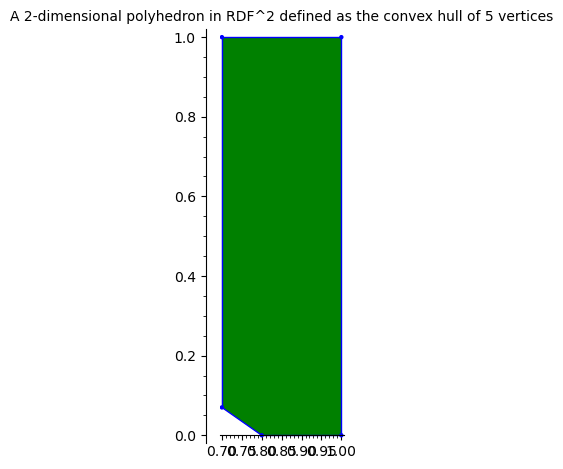

In [15]:
exact(C, gammaP, gammaQ, 6, J)